<a href="https://colab.research.google.com/github/Smjfirna/Arsitektur-Compration/blob/main/Eksperimen_Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, Model, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Dropout
import os
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

In [3]:
base_dir = '/content/drive/MyDrive/Skripsi Syafirna/Propgram/Data Sample 10'

print("Contents of base directory:")
print(os.listdir(base_dir))

Contents of base directory:
['Common_rust', 'Blight', 'Healthy', 'Gray_leaf_spot']


In [4]:
Common_rust_dir = os.path.join(base_dir, 'Common_rust')
Blight_dir = os.path.join(base_dir, 'Blight')
Healthy_dir = os.path.join(base_dir, 'Healthy')
Gray_leaf_spot_dir = os.path.join(base_dir, 'Gray_leaf_spot')

In [5]:
Common_rust_fnames = os.listdir(Common_rust_dir)
Blight_fnames = os.listdir(Blight_dir)
Healthy_fnames = os.listdir(Healthy_dir)
Gray_leaf_spot_fnames = os.listdir(Gray_leaf_spot_dir)

In [6]:
print('Total Gambar Common rust :', len(os.listdir(Common_rust_dir)))
print('Total Gambar Blight :', len(os.listdir(Blight_dir)))
print('Total Gambar Healty :', len(os.listdir(Healthy_dir)))
print('Total Gambar Gray Leaf Spot :', len(os.listdir(Gray_leaf_spot_dir)))

Total Gambar Common rust : 130
Total Gambar Blight : 114
Total Gambar Healty : 116
Total Gambar Gray Leaf Spot : 57


In [16]:
img_height = 224
img_width = 224
img_channels = 3
num_epochs= 10

datagen = ImageDataGenerator( rescale = 1.0/255.,
                              #rotation_range=20,
                              #horizontal_flip=True,
                              vertical_flip=True,
                              validation_split=0.2
                            )

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    class_mode='categorical',
    subset='training'  # menggunakan subset 'training' untuk data pelatihan
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    class_mode='categorical',
    subset='validation'  # menggunakan subset 'validation' untuk data validasi
)

Found 335 images belonging to 4 classes.
Found 82 images belonging to 4 classes.


In [17]:
model = Sequential([
    Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(img_height, img_width, img_channels)),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(256, (5,5), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(384, (3,3), activation='relu', padding='same'),
    Conv2D(384, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

In [18]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(train_generator, epochs=num_epochs, validation_data=validation_generator)

Epoch 1/10
11/11 [==============================] - 8s 467ms/step - loss: 1.5749 - accuracy: 0.2985 - val_loss: 1.3425 - val_accuracy: 0.3171
Epoch 2/10
11/11 [==============================] - 4s 411ms/step - loss: 1.3491 - accuracy: 0.3104 - val_loss: 1.3093 - val_accuracy: 0.3049
Epoch 3/10
11/11 [==============================] - 5s 443ms/step - loss: 1.2786 - accuracy: 0.3612 - val_loss: 1.0393 - val_accuracy: 0.6829
Epoch 4/10
11/11 [==============================] - 5s 375ms/step - loss: 1.2210 - accuracy: 0.4209 - val_loss: 1.0310 - val_accuracy: 0.5732
Epoch 5/10
11/11 [==============================] - 5s 431ms/step - loss: 1.2091 - accuracy: 0.4090 - val_loss: 1.0869 - val_accuracy: 0.5244
Epoch 6/10
11/11 [==============================] - 6s 521ms/step - loss: 1.1962 - accuracy: 0.3881 - val_loss: 1.0096 - val_accuracy: 0.5244
Epoch 7/10
11/11 [==============================] - 4s 421ms/step - loss: 1.1881 - accuracy: 0.4179 - val_loss: 1.1427 - val_accuracy: 0.6463
Epoch 

3/3 [==============================] - 1s 144ms/step


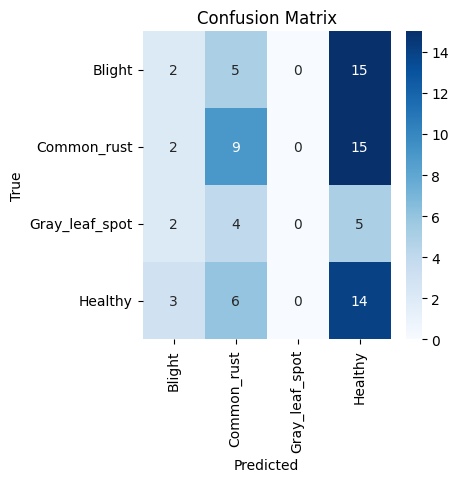


Classification Report:
                 precision    recall  f1-score   support

        Blight       0.22      0.09      0.13        22
   Common_rust       0.38      0.35      0.36        26
Gray_leaf_spot       0.00      0.00      0.00        11
       Healthy       0.29      0.61      0.39        23

      accuracy                           0.30        82
     macro avg       0.22      0.26      0.22        82
  weighted avg       0.26      0.30      0.26        82



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# ...

# Setelah Anda melatih model, lakukan prediksi pada data uji
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Dapatkan label yang benar
y_true = validation_generator.classes

# Buat confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Tampilkan confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Tampilkan laporan klasifikasi
print('\nClassification Report:\n', classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))